In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

history = pd.DataFrame()

for i in range(9):
    f = open('spotify_data\StreamingHistory{}.json'.format(i), encoding='utf-8')
    data = json.load(f)
    df = pd.DataFrame(data)
    history = pd.concat([history, df], ignore_index=True)

history['endTime'] = pd.DatetimeIndex(history['endTime']).tz_localize('UTC').tz_convert('America/New_York')
history['minsPlayed'] = history['msPlayed']/(1000*60)
history['hrsPlayed'] = history['msPlayed']/(1000*60*60)
history['year'] = pd.DatetimeIndex(history['endTime']).year
history['month'] = pd.DatetimeIndex(history['endTime']).month
history['day'] = pd.DatetimeIndex(history['endTime']).day
history['hour'] = pd.DatetimeIndex(history['endTime']).hour
history['dayofweek'] = pd.DatetimeIndex(history['endTime']).dayofweek
history

,endTime,artistName,trackName,msPlayed,minsPlayed,hrsPlayed,year,month,day,hour,dayofweek
0,2021-01-15 19:02:00-05:00,Lauv,Sad Forever,203520,3.392000,0.056533,2021,1,15,19,4
1,2021-01-15 19:05:00-05:00,Lauv,Invisible Things,197306,3.288433,0.054807,2021,1,15,19,4
2,2021-01-15 19:09:00-05:00,Lauv,Julia,218000,3.633333,0.060556,2021,1,15,19,4
3,2021-01-15 19:13:00-05:00,Lauv,Modern Loneliness,252337,4.205617,0.070094,2021,1,15,19,4
4,2021-01-15 19:16:00-05:00,Lauv,Drugs & The Internet,178560,2.976000,0.049600,2021,1,15,19,4
...,...,...,...,...,...,...,...,...,...,...,...
85950,2022-01-16 18:47:00-05:00,Aly & AJ,Potential Breakup Song,25884,0.431400,0.007190,2022,1,16,18,6
85951,2022-01-16 18:47:00-05:00,Anson Seabra,Welcome to Wonderland,90145,1.502417,0.025040,2022,1,16,18,6
85952,2022-01-16 18:48:00-05:00,Lauren Spencer-Smith,Fingers Crossed,46376,0.772933,0.012882,2022,1,16,18,6
85953,2022-01-16 18:49:00-05:00,Haley Joelle,Memory Lane,85724,1.428733,0.023812,2022,1,16,18,6


# **Distribution of listening during times of the day**

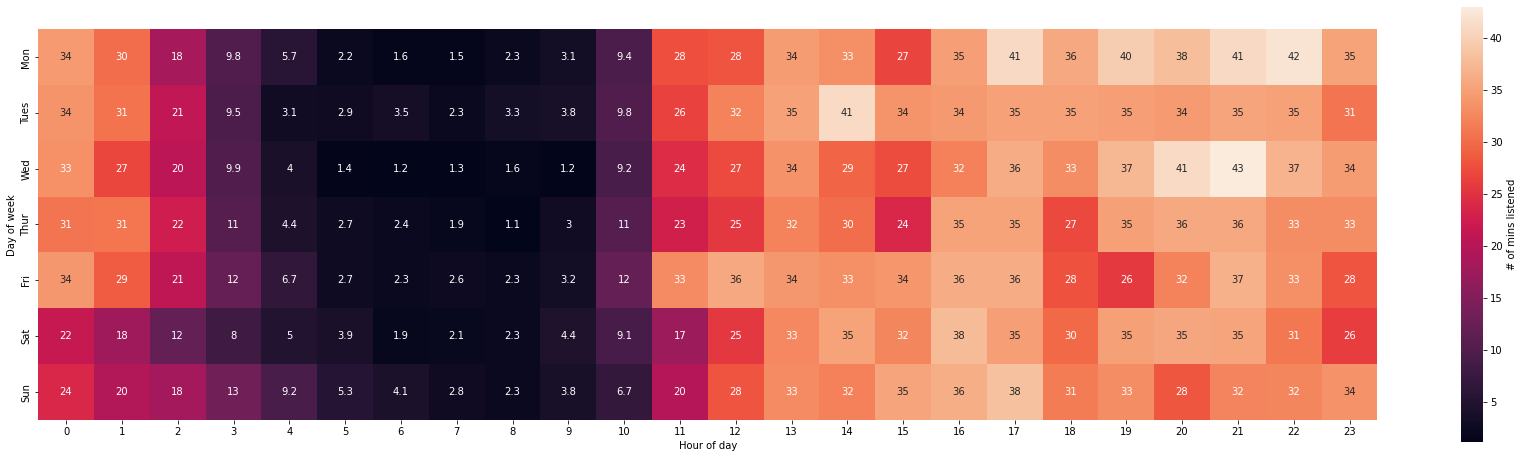

In [2]:
listening_times = history.groupby(['dayofweek', 'hour']).agg({'minsPlayed': ['sum']})/52
listening_times = listening_times.unstack()
listening_times.columns = listening_times.columns.droplevel([0,1])


plt.figure(figsize=(30,20))
ax= sns.heatmap(listening_times, annot=True, square = True, yticklabels=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],cbar_kws={"shrink": .4, 'label': '# of mins listened'})
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

# **Listening over time**

In [4]:
listening_over_time = history.groupby(['year', 'month', 'day'], as_index=False)['hrsPlayed'].agg(sum)
listening_over_time['weekly_avg'] = listening_over_time['hrsPlayed'].rolling(7, center=True).mean()
listening_over_time['monthly_avg'] = listening_over_time['hrsPlayed'].rolling(30, center=True).mean()
listening_over_time['date'] = listening_over_time[listening_over_time.columns[:3]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
listening_over_time

,year,month,day,hrsPlayed,weekly_avg,monthly_avg,date
0,2021,1,15,2.675541,NaN,NaN,2021-1-15
1,2021,1,16,7.386872,NaN,NaN,2021-1-16
2,2021,1,17,6.392883,NaN,NaN,2021-1-17
3,2021,1,18,11.109373,6.703402,NaN,2021-1-18
4,2021,1,19,8.413294,7.732479,NaN,2021-1-19
...,...,...,...,...,...,...,...
362,2022,1,12,7.601646,10.190534,NaN,2022-1-12
363,2022,1,13,7.236065,9.296294,NaN,2022-1-13
364,2022,1,14,10.812957,NaN,NaN,2022-1-14
365,2022,1,15,13.712721,NaN,NaN,2022-1-15


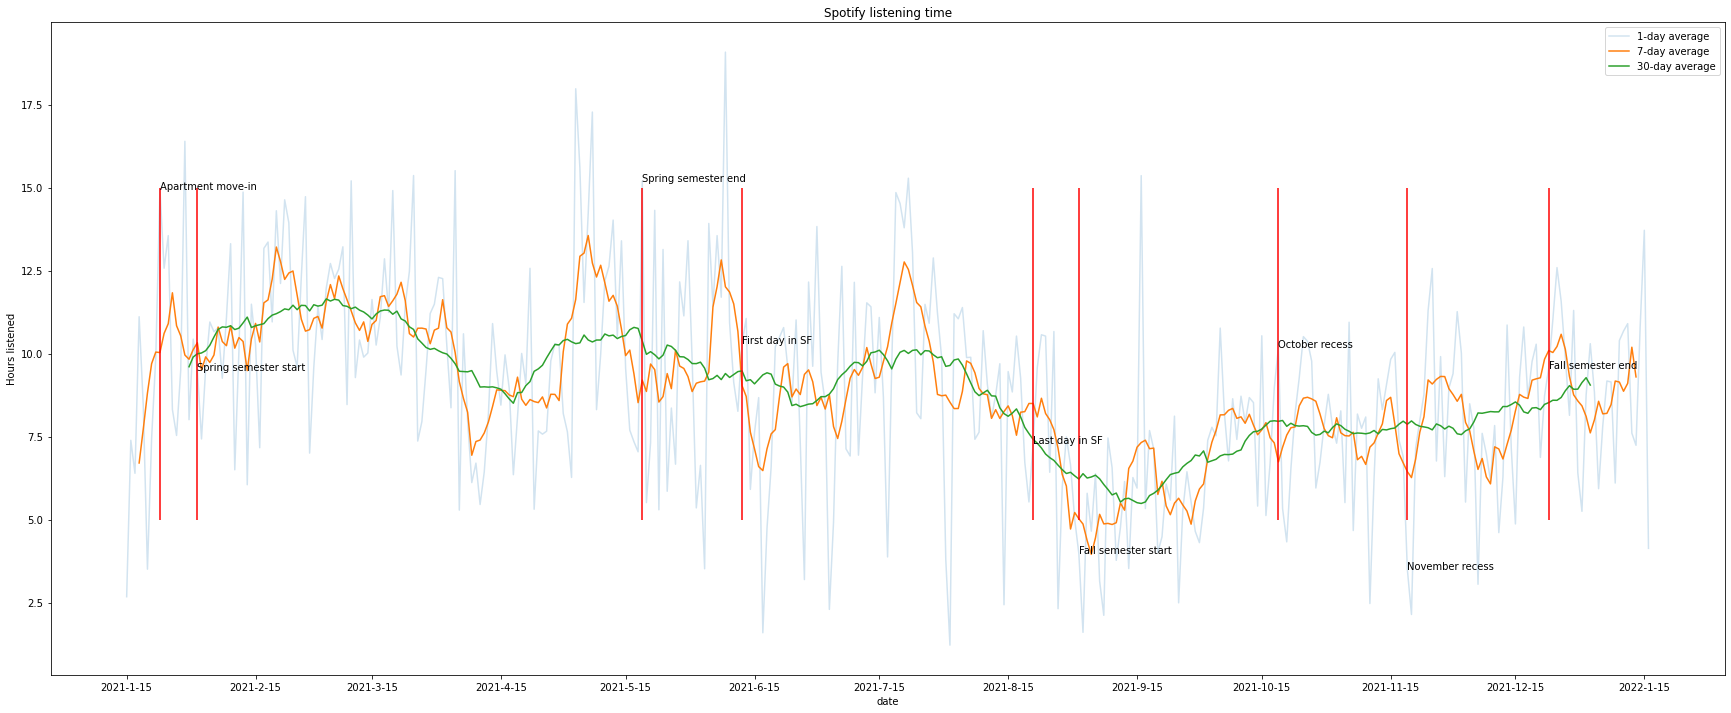

In [5]:
from matplotlib import dates

plt.figure(figsize=(30,12))
ax = sns.lineplot(data = listening_over_time,  x='date', y ='hrsPlayed', label='1-day average', alpha=0.2)
ax = sns.lineplot(data = listening_over_time,  x='date', y ='weekly_avg', label='7-day average')
ax = sns.lineplot(data = listening_over_time,  x='date', y ='monthly_avg', label='30-day average')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 

significant_dates = {'2021-1-23': 'Apartment move-in',
                     '2021-2-1': 'Spring semester start', 
                     '2021-5-19':'Spring semester end',
                     '2021-6-12': 'First day in SF', 
                     '2021-8-21': 'Last day in SF',
                     '2021-9-1': 'Fall semester start',
                     '2021-10-19': 'October recess',
                     '2021-11-19': 'November recess',
                     '2021-12-23': 'Fall semester end'}

for date, desc in significant_dates.items():
    hrs  = np.array(listening_over_time.loc[listening_over_time['date'] ==date, 'hrsPlayed'])
    plt.vlines(x=date, ymin=5, ymax=15, color="red", )
    plt.text(date, hrs, desc)

plt.title('Spotify listening time')
plt.ylabel("Hours listened")
plt.legend()
plt.show()

# **Distribution of number of daily listening hours**

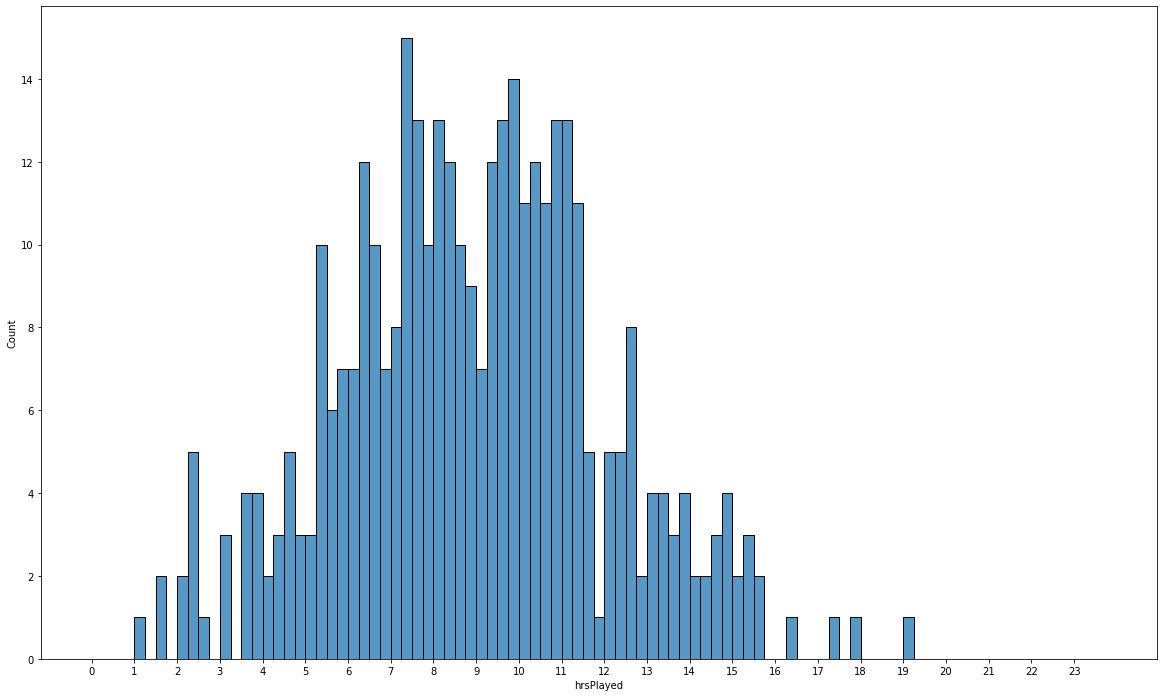

In [ ]:
plt.figure(figsize=(20,12))
sns.histplot(listening_over_time['hrsPlayed'], bins=np.arange(0, 24, 0.25))
plt.xticks(np.arange(24))
plt.show()